# .<p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis - Gdz Elektrik Datathon (Aug 2022)</p>

**Expectation**: Prediction of unplanned outage on a daily and power unit basis

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from skimpy import clean_columns
from skimpy import skim
import scipy.stats as stats
import re

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Reading the **Train** Data

In [3]:
df0 = pd.read_csv("train.csv")
df = df0.copy()

In [9]:
df.head(2).T

,0,1
KESİNTİ_NO,2228825,2228866
İL,İZMİR,İZMİR
İLÇE,BORNOVA,BORNOVA
ŞEBEKE_UNSURU,OG Fideri,OG Fideri
ŞEBEKE_UNSURU_KODU,K-633 35-02-K00633_K-259 K01_2034347,K-633 35-02-K00633_K-259 K01_2034347
KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA,OG Fider Açması,OG Fider Açması
KAYNAĞA_GÖRE,Dağıtım-OG,Dağıtım-OG
SÜREYE_GÖRE,Uzun,Uzun
SEBEBE_GÖRE,Şebeke işletmecisi,Şebeke işletmecisi
BİLDİRİME_GÖRE,Bildirimsiz,Bildirimsiz


In [10]:
df.tail(2).T

,100889,100890
KESİNTİ_NO,2198627,2184288
İL,İZMİR,İZMİR
İLÇE,BORNOVA,KARŞIYAKA
ŞEBEKE_UNSURU,Abone Tesisi,Abone Tesisi
ŞEBEKE_UNSURU_KODU,M-1785 35-02-M01785_95001315178_95001315178,M-2423 35-04-M02423_95001349833_95001349833
KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA,AG Pano Kol Sigorta Atığı,AG Branşman Yeraltı Kablo Arızası
KAYNAĞA_GÖRE,Dağıtım-AG,Dağıtım-AG
SÜREYE_GÖRE,Uzun,Uzun
SEBEBE_GÖRE,Şebeke işletmecisi,Şebeke işletmecisi
BİLDİRİME_GÖRE,Bildirimsiz,Bildirimsiz


In [6]:
df.shape

(100891, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100891 entries, 0 to 100890
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   KESİNTİ_NO                         100891 non-null  int64  
 1   İL                                 100891 non-null  object 
 2   İLÇE                               100891 non-null  object 
 3   ŞEBEKE_UNSURU                      100891 non-null  object 
 4   ŞEBEKE_UNSURU_KODU                 100891 non-null  object 
 5   KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA  100891 non-null  object 
 6   KAYNAĞA_GÖRE                       100891 non-null  object 
 7   SÜREYE_GÖRE                        100891 non-null  object 
 8   SEBEBE_GÖRE                        100890 non-null  object 
 9   BİLDİRİME_GÖRE                     100891 non-null  object 
 10  BAŞLAMA_TARİHİ_VE_ZAMANI           100891 non-null  object 
 11  SONA_ERME_TARİHİ_VE_ZAMANI         1008

In [11]:
df.columns

Index(['KESİNTİ_NO', 'İL', 'İLÇE', 'ŞEBEKE_UNSURU', 'ŞEBEKE_UNSURU_KODU',
       'KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA', 'KAYNAĞA_GÖRE', 'SÜREYE_GÖRE',
       'SEBEBE_GÖRE', 'BİLDİRİME_GÖRE', 'BAŞLAMA_TARİHİ_VE_ZAMANI',
       'SONA_ERME_TARİHİ_VE_ZAMANI', 'KESİNTİ_SÜRESİ', 'KENTSEL_OG',
       'KENTSEL_AG', 'KENTALTI_OG', 'KENTALTI_AG', 'KIRSAL_OG', 'KIRSAL_AG',
       'TOPLAM_KENTSEL_OG', 'TOPLAM_KENTSEL_AG', 'TOPLAM_KENTALTI_OG',
       'TOPLAM_KENTALTI_AG', 'TOPLAM_KIRSAL_OG', 'TOPLAM_KIRSAL_AG'],
      dtype='object')

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
kesinti_no,100891.000,2078226.208,173353.864,1805939.000,1893845.000,2135841.000,2232883.500,2316008.000
kesinti_suresi,100891.000,2.380,2.642,-2.963,0.932,1.729,3.053,289.323
kentsel_og,100891.000,7.779,36.657,0.000,0.000,0.000,0.000,1160.000
kentsel_ag,100891.000,357.187,1658.876,0.000,0.000,4.000,87.000,70961.000
kentalti_og,100891.000,1.234,12.338,0.000,0.000,0.000,0.000,728.000
kentalti_ag,100891.000,59.599,582.433,0.000,0.000,0.000,0.000,44781.000
kirsal_og,100891.000,2.358,16.121,0.000,0.000,0.000,0.000,482.000
kirsal_ag,100891.000,63.001,381.360,0.000,0.000,0.000,0.000,11673.000
toplam_kentsel_og,100751.000,7.675,57.584,-7.414,0.000,0.000,0.000,6042.792
toplam_kentsel_ag,100751.000,302.453,1466.112,-2233.601,0.000,7.232,119.663,129419.169


> usually standard deviations are higher than means. Expect extreme values.

In [18]:
df.describe(include="O").T

,count,unique,top,freq
il,100891,2,İZMİR,68870
ilce,100891,47,ÇEŞME,5547
sebeke_unsuru,100891,8,Abone Tesisi,34227
sebeke_unsuru_kodu,100891,61480,TIRAZLI KÖK 45-79-M00079_BAHARLAR M01_72036244,67
kesinti_nedenine_iliskin_aciklama,100891,65,OG Fider Açması,19968
kaynaga_gore,100891,3,Dağıtım-AG,70107
sureye_gore,100891,2,Uzun,98033
sebebe_gore,100890,3,Şebeke işletmecisi,98807
bildirime_gore,100891,1,Bildirimsiz,100891
baslama_tarihi_ve_zamani,100891,100298,08.08.2021 07:35:52,4


In [15]:
df.isnull().sum()

kesinti_no                             0
il                                     0
ilce                                   0
sebeke_unsuru                          0
sebeke_unsuru_kodu                     0
kesinti_nedenine_iliskin_aciklama      0
kaynaga_gore                           0
sureye_gore                            0
sebebe_gore                            1
bildirime_gore                         0
baslama_tarihi_ve_zamani               0
sona_erme_tarihi_ve_zamani             0
kesinti_suresi                         0
kentsel_og                             0
kentsel_ag                             0
kentalti_og                            0
kentalti_ag                            0
kirsal_og                              0
kirsal_ag                              0
toplam_kentsel_og                    140
toplam_kentsel_ag                    140
toplam_kentalti_og                   140
toplam_kentalti_ag                   140
toplam_kirsal_og                     140
toplam_kirsal_ag

In [16]:
df.isnull().sum() / df.shape[0] * 100

kesinti_no                          0.000
il                                  0.000
ilce                                0.000
sebeke_unsuru                       0.000
sebeke_unsuru_kodu                  0.000
kesinti_nedenine_iliskin_aciklama   0.000
kaynaga_gore                        0.000
sureye_gore                         0.000
sebebe_gore                         0.001
bildirime_gore                      0.000
baslama_tarihi_ve_zamani            0.000
sona_erme_tarihi_ve_zamani          0.000
kesinti_suresi                      0.000
kentsel_og                          0.000
kentsel_ag                          0.000
kentalti_og                         0.000
kentalti_ag                         0.000
kirsal_og                           0.000
kirsal_ag                           0.000
toplam_kentsel_og                   0.139
toplam_kentsel_ag                   0.139
toplam_kentalti_og                  0.139
toplam_kentalti_ag                  0.139
toplam_kirsal_og                  

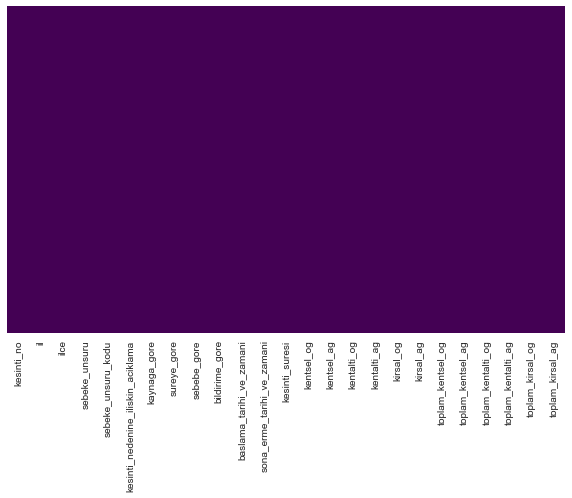

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [22]:
# df.isnull().sum()

isnull = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
isnull

,isnull
kesinti_no,0
il,0
ilce,0
sebeke_unsuru,0
sebeke_unsuru_kodu,0
kesinti_nedenine_iliskin_aciklama,0
kaynaga_gore,0
sureye_gore,0
sebebe_gore,1
bildirime_gore,0


In [23]:
# df.isnull().sum()*100 / df.shape[0]

percentage_null = round(pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['percentage_null']),2)
percentage_null

,percentage_null
kesinti_no,0.000
il,0.000
ilce,0.000
sebeke_unsuru,0.000
sebeke_unsuru_kodu,0.000
kesinti_nedenine_iliskin_aciklama,0.000
kaynaga_gore,0.000
sureye_gore,0.000
sebebe_gore,0.000
bildirime_gore,0.000


In [24]:
# summary_null = pd.concat([df.isnull().sum().to_frame(), (df.isnull().sum()*100 / df.shape[0]).to_frame()], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
# summary_null

summary_null = pd.concat([isnull, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,Columns,isnull,percentage_null
0,kesinti_no,0,0.000
1,il,0,0.000
2,ilce,0,0.000
3,sebeke_unsuru,0,0.000
4,sebeke_unsuru_kodu,0,0.000
5,kesinti_nedenine_iliskin_aciklama,0,0.000
6,kaynaga_gore,0,0.000
7,sureye_gore,0,0.000
8,sebebe_gore,1,0.000
9,bildirime_gore,0,0.000


> minimal null values

In [20]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['il', 'ilce', 'sebeke_unsuru', 'sebeke_unsuru_kodu',
       'kesinti_nedenine_iliskin_aciklama', 'kaynaga_gore', 'sureye_gore',
       'sebebe_gore', 'bildirime_gore', 'baslama_tarihi_ve_zamani',
       'sona_erme_tarihi_ve_zamani'],
      dtype='object')

In [21]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("//"*20)

il
----------------
İZMİR     68870
MANİSA    32021
Name: il, dtype: int64
////////////////////////////////////////
ilce
----------------
ÇEŞME          5547
ÖDEMİŞ         4524
YUNUSEMRE      4385
URLA           3676
AKHİSAR        3662
BORNOVA        3595
TORBALI        3589
MENDERES       3578
SALİHLİ        3547
KONAK          3370
TURGUTLU       2985
ŞEHZADELER     2959
ALAŞEHİR       2905
KEMALPAŞA      2875
MENEMEN        2740
BERGAMA        2669
BUCA           2655
TİRE           2631
DİKİLİ         2509
SEFERİHİSAR    2440
KİRAZ          2407
KARABAĞLAR     2354
BAYINDIR       2240
KARABURUN      2175
KARŞIYAKA      2155
SARUHANLI      2033
ALİAĞA         1864
SOMA           1775
BAYRAKLI       1727
ÇİĞLİ          1716
GÖRDES         1485
FOÇA           1324
KULA           1286
SARIGÖL        1224
SELENDİ        1067
GAZİEMİR        909
KIRKAĞAÇ        874
KINIK           752
DEMİRCİ         721
GÜZELBAHÇE      676
SELÇUK          658
BEYDAĞ          566
NARLIDERE       516
KÖ

In [26]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100891 │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 25     │ │ int32       │ 7     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 7     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %  ┃ mean     ┃ sd      ┃ p0       ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ kesinti_no           │    0 │     0 │  2100000 │  170000 │  1800000 │ 1900000 │ 2200000 │ 2300000 │ ▇▄▂▃▆█ │  │
│ │ kesinti_suresi       │    0 │     0 │      2.4 │     2.6 │       -3 │    0.93 │     3.1 │     290 │   █    │  │
│ │ kentsel_og           │    0 │     0 │      7.8 │      37 │        0 │       0 │       0 │    1200 │   █    │  │
│ │ kentsel_ag           │    0 │     0 │      360 │    1700 │        0 │       0 │      87 │   71000 │   █    │  │
│ │ kentalti_og          │    0 │     0 │      1.2 │      12 │        0 │       0 │       0 │     730 │   █    │  │
│ │ kentalti_ag          │    0 │     0 │       60 │     580 │        0 │       0 │       0 │   45000 │   █    │  │
│ │ kirsal_og            │    0 │     0 │      2.4 │      16 │        0 │       0 │       0 │     480 │   █    │  │
│ │ kirsal_ag            │    0 │     0 │       63 │     380 │        0 │       0 │       0 │   12000 │   █    │  │
│ │ toplam_kentsel_og    │  140 │  0.14 │      7.7 │      58 │     -7.4 │       0 │       0 │    6000 │   █    │  │
│ │ toplam_kentsel_ag    │  140 │  0.14 │      300 │    1500 │    -2200 │       0 │     120 │  130000 │   █    │  │
│ │ toplam_kentalti_og   │  140 │  0.14 │     0.94 │      15 │        0 │       0 │       0 │    1700 │   █    │  │
│ │ toplam_kentalti_ag   │  140 │  0.14 │       41 │     460 │        0 │       0 │       0 │   57000 │   █    │  │
│ │ toplam_kirsal_og     │  140 │  0.14 │      1.8 │      20 │        0 │       0 │       0 │    2100 │   █    │  │
│ │ toplam_kirsal_ag     │  140 │  0.14 │       46 │     360 │        0 │       0 │       0 │   32000 │   █    │  │
│ └──────────────────────┴──────┴───────┴──────────┴─────────┴──────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA    ┃ NA %          ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ il                                  │     0 │             0 │                       1 │             100000 │  │
│ │ ilce                                │     0 │             0 │                       1 │             100000 │  │
│ │ sebeke_unsuru                       │     0 │       

Cleaning column names with `skimpy.clean_columns`

In [14]:
df = clean_columns(df)
print(df.columns)

25 column names have been cleaned

Index(['kesinti_no', 'il', 'ilce', 'sebeke_unsuru', 'sebeke_unsuru_kodu',
       'kesinti_nedenine_iliskin_aciklama', 'kaynaga_gore', 'sureye_gore',
       'sebebe_gore', 'bildirime_gore', 'baslama_tarihi_ve_zamani',
       'sona_erme_tarihi_ve_zamani', 'kesinti_suresi', 'kentsel_og',
       'kentsel_ag', 'kentalti_og', 'kentalti_ag', 'kirsal_og', 'kirsal_ag',
       'toplam_kentsel_og', 'toplam_kentsel_ag', 'toplam_kentalti_og',
       'toplam_kentalti_ag', 'toplam_kirsal_og', 'toplam_kirsal_ag'],
      dtype='object')


## .<p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Examination of Columns</p>

### **<span style='color:coral'> kesinti_no </span>** 

KOD_NO(Outage ID): CRM - Müşteri/abonenin aramalarını karşılayan sorumlu tarafından alınan çağrıya istinaden TSKS sisteminde açılan kesinti kaydına atanan benzersiz(unique) numaradır.

In [27]:
df.kesinti_no.value_counts(dropna=False)

2228825    1
2170552    1
2059220    1
1828696    1
2058998    1
          ..
1836905    1
1875155    1
1808450    1
2026753    1
2184288    1
Name: kesinti_no, Length: 100891, dtype: int64

In [28]:
df['kesinti_no'].nunique()

100891

> all unique values, ID for outage occurances

### **<span style='color:coral'> il </span>** 

Kesinti kaydının açıldığı şehri belirtir.

In [29]:
df.il.value_counts(dropna=False)

İZMİR     68870
MANİSA    32021
Name: il, dtype: Int64

In [30]:
df.il.isnull().sum()

0

> no missing values, City of outage occurances

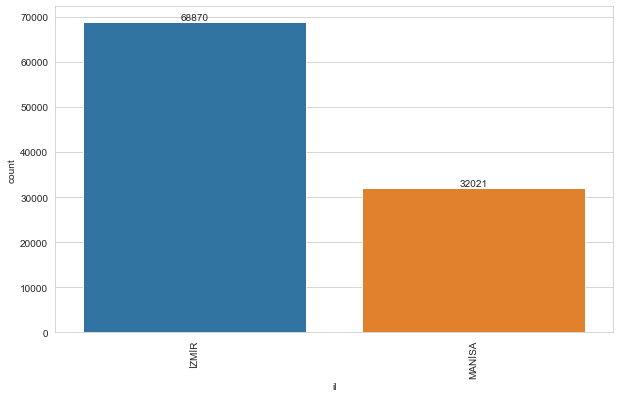

In [47]:
ax = sns.countplot(data=df, x="il")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> **Izmir** has the highest number of outages, more than two times higher than **Manisa**.

### **<span style='color:coral'> ilce </span>** 

Kesinti kaydının açıldığı ilçeyi belirtir.

In [31]:
df.ilce.value_counts(dropna=False)

ÇEŞME          5547
ÖDEMİŞ         4524
YUNUSEMRE      4385
URLA           3676
AKHİSAR        3662
BORNOVA        3595
TORBALI        3589
MENDERES       3578
SALİHLİ        3547
KONAK          3370
TURGUTLU       2985
ŞEHZADELER     2959
ALAŞEHİR       2905
KEMALPAŞA      2875
MENEMEN        2740
BERGAMA        2669
BUCA           2655
TİRE           2631
DİKİLİ         2509
SEFERİHİSAR    2440
KİRAZ          2407
KARABAĞLAR     2354
BAYINDIR       2240
KARABURUN      2175
KARŞIYAKA      2155
SARUHANLI      2033
ALİAĞA         1864
SOMA           1775
BAYRAKLI       1727
ÇİĞLİ          1716
GÖRDES         1485
FOÇA           1324
KULA           1286
SARIGÖL        1224
SELENDİ        1067
GAZİEMİR        909
KIRKAĞAÇ        874
KINIK           752
DEMİRCİ         721
GÜZELBAHÇE      676
SELÇUK          658
BEYDAĞ          566
NARLIDERE       516
KÖPRÜBAŞI       460
BALÇOVA         433
AHMETLİ         364
GÖLMARMARA      289
Name: ilce, dtype: Int64

In [33]:
df.ilce.nunique()

47

In [32]:
df.ilce.isnull().sum()

0

> no missing values, District of outage occurances

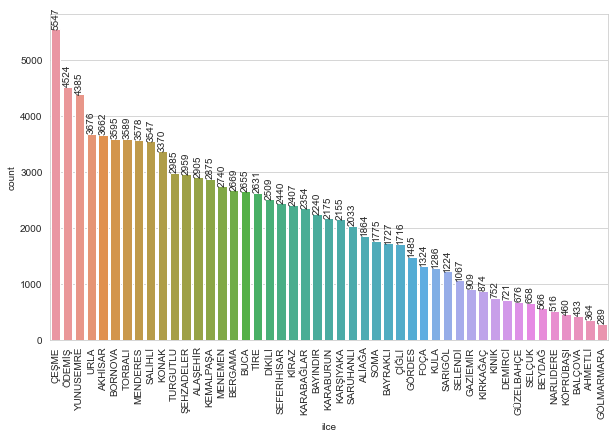

In [42]:
large_to_small = df.groupby('ilce').size().sort_values().index[::-1]
ax = sns.countplot(data=df, x="ilce", order=large_to_small)

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, rotation = 90);

> **Cesme**, **Odemis** and **Yunusemre** districts have higher number of outages

### **<span style='color:coral'> sebeke_unsuru </span>** 

Kesinti kaydı açılırken kesintinin olduğu şebeke unsurunu belirtir.

In [48]:
df.sebeke_unsuru.value_counts(dropna=False)

Abone Tesisi                 34227
AG Fideri                    24389
OG Fideri                    11183
DM                            9736
Dağıtım Transformatörü        7804
KÖK                           7632
Saha Dağıtım Kutusu (SDK)     3665
TM Fideri                     2255
Name: sebeke_unsuru, dtype: Int64

In [49]:
df.sebeke_unsuru.isnull().sum()

0

> no missing values

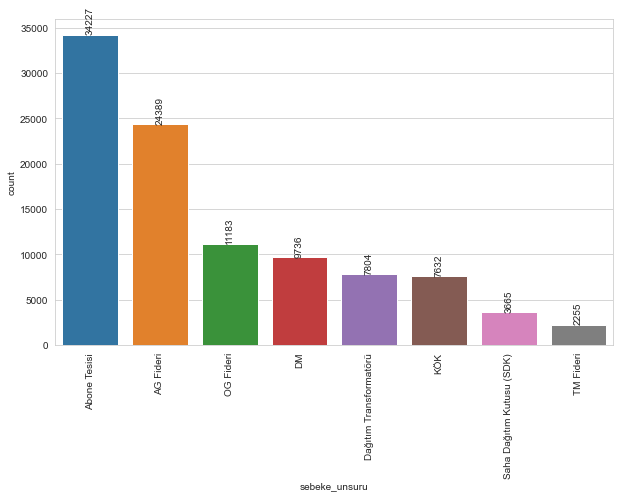

In [50]:
large_to_small = df.groupby('sebeke_unsuru').size().sort_values().index[::-1]
ax = sns.countplot(data=df, x="sebeke_unsuru", order=large_to_small)

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, rotation = 90);

### **<span style='color:coral'> sebeke_unsuru_kodu </span>** 

Kesinti kaydı açılırken kesintinin olduğu şebeke unsuru kodudur.

In [51]:
df.sebeke_unsuru_kodu.value_counts(dropna=False)

TIRAZLI KÖK 45-79-M00079_BAHARLAR M01_72036244                67
SELÇUK İM/DM 35-13-A00004_SELÇUK ZİRAİ SULAMA L05_65986069    67
MENDERES DM-2/TR-1 35-22-M00300_KÖYLER-1 M15_2095712          66
SİYEKLİ KÖK 45-71-M00185_OSMANCALI M04_72256923               66
SİYEKLİ KÖK 45-71-M00185_MALDAN M05_72256924                  62
                                                              ..
DM06/TR08 45-73-M00036_945672137_945672137                     1
DM02/TR18 BELEDİYE ÖNÜ 45-73-M00012_945672452_945672452        1
PİYADELER TR-1 45-73-M00165_945672651_945672651                1
PİYADELER TR-1 45-73-M00165_945672730_945672730                1
M-2423 35-04-M02423_95001349833_95001349833                    1
Name: sebeke_unsuru_kodu, Length: 61480, dtype: Int64

In [53]:
df.sebeke_unsuru_kodu.nunique()

61480

In [52]:
df.sebeke_unsuru_kodu.isnull().sum()

0

> no missing values

In [54]:
df.groupby("sebeke_unsuru")["sebeke_unsuru_kodu"].value_counts(dropna=False)

sebeke_unsuru  sebeke_unsuru_kodu                                 
AG Fideri      GÜZELKÖY TR 45-71-M00984_44426475_56395521_56395521    24
               M-212(DM-3/10) 35-09-M00212_D_56382280_56382280        21
               K-290 35-01-K00290_A_60984145_60984145                 20
               MURADİYE TR-4 45-71-M01417_A_56384528_56384528         20
               M-2112 35-03-M02112_A_56365376_56365376                19
                                                                      ..
TM Fideri      ŞEMİKLER TM 35-04-A00003_ŞEMİKLER-2 K26_2311170         1
               ŞEMİKLER TM 35-04-A00003_ŞEMİKLER-3 K27_2311171         1
               ŞEMİKLER TM 35-04-A00003_ŞEMİKLER-8 K33_2055846         1
               ŞEMİKLER TM 35-04-A00003_ŞEMİKLER-8 K33_2312123         1
               ŞEMİKLER TM 35-04-A00003_ŞEMİKLER-9 K38_2312126         1
Name: sebeke_unsuru_kodu, Length: 61480, dtype: int64

> this column serves as equipment ID of outage node?

### **<span style='color:coral'> kesinti_nedenine_iliskin_aciklama </span>** 

Açılan kesinti kaydında liste içerisinden CRM sorumlusu tarafından seçilen kesinti nedenidir.

In [55]:
df.kesinti_nedenine_iliskin_aciklama.value_counts(dropna=False)

OG Fider Açması                           19968
AG Havai Branşman Arızası                 18144
AG Pano Kol Sigorta Atığı                 16932
AG Box / Sdk Abone Çıkış Sigorta Atığı     6108
AG Branşman Yeraltı Kablo Arızası          5936
                                          ...  
OG Travers Arızası                           11
Şebeke Bakım Çalışması                        3
Trafo Bakım Çalışması                         3
Yangın Sonucu Şebeke Hasarı                   2
TEİAŞ Hat Bakım Çalışması                     1
Name: kesinti_nedenine_iliskin_aciklama, Length: 65, dtype: Int64

In [56]:
df.kesinti_nedenine_iliskin_aciklama.isnull().sum()

0

> no missing values

In [57]:
df.kesinti_nedenine_iliskin_aciklama.nunique()

65

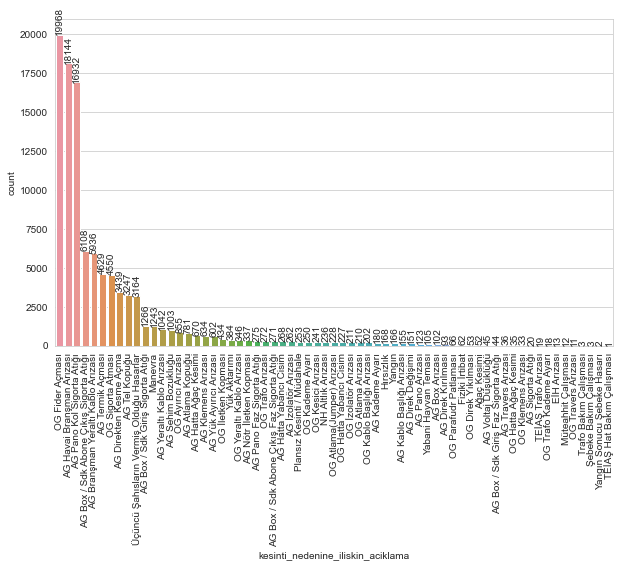

In [58]:
large_to_small = df.groupby('kesinti_nedenine_iliskin_aciklama').size().sort_values().index[::-1]
ax = sns.countplot(data=df, x="kesinti_nedenine_iliskin_aciklama", order=large_to_small)

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, rotation = 90);

> details of outage cause. Top 3 values constitute almost 50% of all

### **<span style='color:coral'> kaynaga_gore </span>** 

Kesintinin yaşandığı hattın tipini belirtir. Dağıtım-OG / Dağıtım-AG / İletim seçenekleri arasından seçilir.

In [59]:
df.kaynaga_gore.value_counts(dropna=False)

Dağıtım-AG    70107
Dağıtım-OG    30248
İletim          536
Name: kaynaga_gore, dtype: Int64

In [60]:
df.kaynaga_gore.isnull().sum()

0

> no missing values

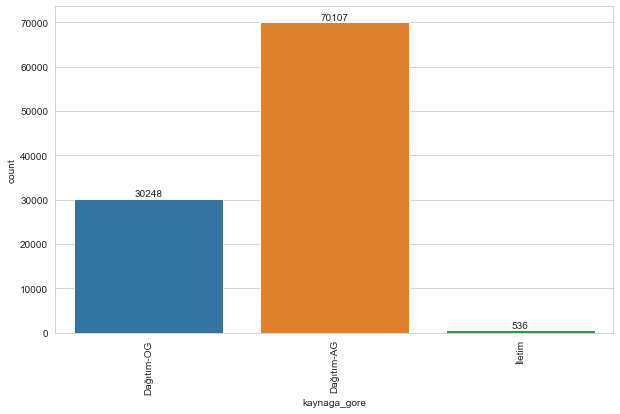

In [61]:
ax = sns.countplot(data=df, x="kaynaga_gore")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

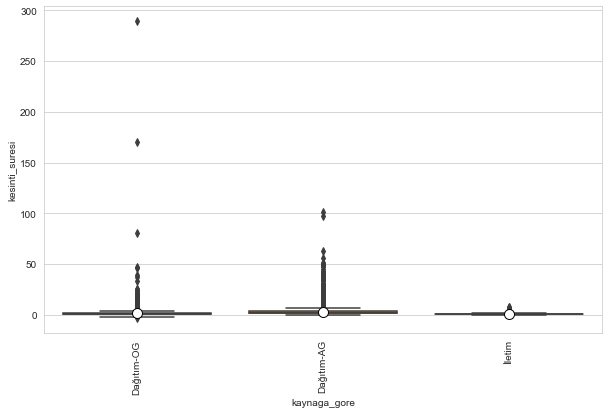

In [100]:
# plotting kesinti_suresi by kaynaga_gore to see extreme values
ax = sns.boxplot(data=df, 
            y="kesinti_suresi",
            x="kaynaga_gore",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.xticks(rotation = 90);

### **<span style='color:coral'> sureye_gore </span>** 

Belirlenmiş kısıta istinaden, kesinti süresinin uzun/kısa olduğunu belirtir.

In [62]:
df.sureye_gore.value_counts(dropna=False)

Uzun    98033
Kısa     2858
Name: sureye_gore, dtype: Int64

In [63]:
df.sureye_gore.isnull().sum()

0

> no missing values

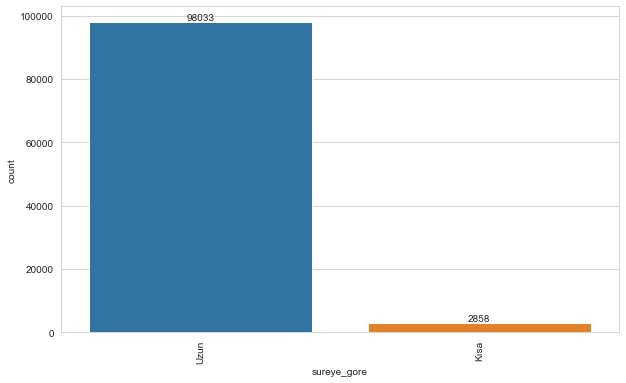

In [64]:
ax = sns.countplot(data=df, x="sureye_gore")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

> **Long duration** of outage is dominant

### **<span style='color:coral'> sebebe_gore </span>** 

Dışsal / Güvenlik / Şebeke İşletmecisi seçeneklerinden seçilir.

In [65]:
df.sebebe_gore.value_counts(dropna=False)

Şebeke işletmecisi    98807
Dışsal                 1978
Güvenlik                105
NaN                       1
Name: sebebe_gore, dtype: Int64

> one missing value

In [69]:
df.groupby(["kaynaga_gore", "sureye_gore"])["sebebe_gore"].value_counts(dropna=False)

kaynaga_gore  sureye_gore  sebebe_gore       
Dağıtım-AG    Kısa         Şebeke işletmecisi        5
              Uzun         Şebeke işletmecisi    68805
                           Dışsal                 1275
                           Güvenlik                 22
Dağıtım-OG    Kısa         Şebeke işletmecisi     2833
                           Dışsal                    2
              Uzun         Şebeke işletmecisi    26634
                           Dışsal                  696
                           Güvenlik                 82
                           NaN                       1
İletim        Kısa         Şebeke işletmecisi       18
              Uzun         Şebeke işletmecisi      512
                           Dışsal                    5
                           Güvenlik                  1
Name: sebebe_gore, dtype: int64

In [70]:
# show group mode values
df.groupby(["kaynaga_gore", "sureye_gore"])['sebebe_gore'].apply(lambda x: x.mode()[0])

kaynaga_gore  sureye_gore
Dağıtım-AG    Kısa           Şebeke işletmecisi
              Uzun           Şebeke işletmecisi
Dağıtım-OG    Kısa           Şebeke işletmecisi
              Uzun           Şebeke işletmecisi
İletim        Kısa           Şebeke işletmecisi
              Uzun           Şebeke işletmecisi
Name: sebebe_gore, dtype: object

In [72]:
# select group mode values with fillna
df["sebebe_gore"] = df.groupby(["kaynaga_gore", "sureye_gore"])['sebebe_gore'].apply(lambda x: x.fillna(x.mode()[0]))
df["sebebe_gore"]

0         Şebeke işletmecisi
1         Şebeke işletmecisi
2         Şebeke işletmecisi
3         Şebeke işletmecisi
4         Şebeke işletmecisi
                 ...        
100886    Şebeke işletmecisi
100887    Şebeke işletmecisi
100888    Şebeke işletmecisi
100889    Şebeke işletmecisi
100890    Şebeke işletmecisi
Name: sebebe_gore, Length: 100891, dtype: string

In [73]:
df.sebebe_gore.isnull().sum()

0

> no missing value

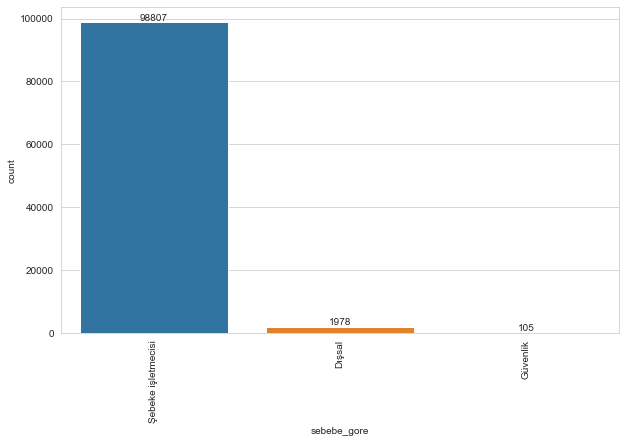

In [66]:
ax = sns.countplot(data=df, x="sebebe_gore")

plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container);

### **<span style='color:coral'> bildirime_gore </span>** 

Kesinti kaydının oluşturulurken çağrı ile bildirilerek veya bildirilmeden kaydının açıldığını belirtir.

In [71]:
df.bildirime_gore.value_counts(dropna=False)

Bildirimsiz    100891
Name: bildirime_gore, dtype: Int64

> no outage has been notified via customer call, good to drop this column since it has only one value

### **<span style='color:coral'> baslama_tarihi_ve_zamani </span>** 

Kesinti kaydının Tedarik Sürekliliği Kayıt Sistemi (TSKS) sisteminde kaydının açıldığı ve kesintinin başladığını belirten tarih/saattir.

In [75]:
df.baslama_tarihi_ve_zamani.value_counts(dropna=False)

08.08.2021 07:35:52    4
25.05.2022 10:03:56    3
14.08.2021 16:06:00    3
05.03.2022 19:37:00    3
12.10.2021 09:43:46    3
                      ..
15.10.2021 22:16:31    1
31.07.2021 18:32:57    1
16.07.2021 08:40:47    1
25.11.2021 11:43:43    1
24.12.2021 11:37:03    1
Name: baslama_tarihi_ve_zamani, Length: 100298, dtype: Int64

In [76]:
df.baslama_tarihi_ve_zamani.dtype

string[python]

> need conversion from str to datetime

In [79]:
# converting from string to datetime format
df.baslama_tarihi_ve_zamani = pd.to_datetime(df.baslama_tarihi_ve_zamani)
df.baslama_tarihi_ve_zamani

0        2022-01-30 20:27:00
1        2022-01-31 03:47:00
2        2022-03-31 16:34:23
3        2022-03-06 21:11:27
4        2022-04-15 09:17:22
                 ...        
100886   2021-12-28 14:53:59
100887   2021-12-26 15:47:27
100888   2021-12-23 20:36:03
100889   2021-12-24 11:37:03
100890   2021-12-18 08:17:55
Name: baslama_tarihi_ve_zamani, Length: 100891, dtype: datetime64[ns]

In [80]:
df.baslama_tarihi_ve_zamani.dtype

dtype('<M8[ns]')

In [81]:
df.baslama_tarihi_ve_zamani.isnull().sum()

0

In [82]:
df.baslama_tarihi_ve_zamani.sort_values()

52062   2021-01-05 00:33:23
50644   2021-01-05 00:33:39
50645   2021-01-05 00:48:17
72042   2021-01-05 01:03:31
73964   2021-01-05 02:20:13
                ...        
18615   2022-09-06 23:07:21
22496   2022-09-06 23:09:00
1482    2022-09-06 23:19:21
18416   2022-09-06 23:26:45
12546   2022-09-06 23:40:57
Name: baslama_tarihi_ve_zamani, Length: 100891, dtype: datetime64[ns]

> outages from Jan 2021 to Sep 2022

### **<span style='color:coral'> sona_erme_tarihi_ve_zamani </span>** 

Kesinti kaydı adına açılan iş emrinin INFOR EAM (Kurumsal Varlık Yönetim Sistemi)'de atanan saha ekibi tarafından kapatıldığı tarih/saati belirtir.

In [83]:
df.sona_erme_tarihi_ve_zamani.value_counts(dropna=False)

02.08.2021 09:36:00    3
23.09.2021 22:28:00    3
05.03.2022 20:21:00    3
14.03.2022 13:31:00    3
02.08.2021 10:06:46    3
                      ..
20.08.2021 14:29:13    1
23.08.2021 10:28:59    1
04.10.2021 21:14:53    1
26.05.2021 20:13:09    1
18.12.2021 09:40:55    1
Name: sona_erme_tarihi_ve_zamani, Length: 100507, dtype: Int64

In [84]:
df.sona_erme_tarihi_ve_zamani.dtype

string[python]

> need conversion from str to datetime

In [88]:
# converting from string to datetime format
df.sona_erme_tarihi_ve_zamani = pd.to_datetime(df.sona_erme_tarihi_ve_zamani)
df.sona_erme_tarihi_ve_zamani

0        2022-01-31 01:32:04
1        2022-01-31 05:30:45
2        2022-03-31 17:21:07
3        2022-03-06 22:44:57
4        2022-04-15 10:29:18
                 ...        
100886   2021-12-28 18:10:05
100887   2021-12-26 16:50:52
100888   2021-12-23 21:35:39
100889   2021-12-24 12:24:08
100890   2021-12-18 09:40:55
Name: sona_erme_tarihi_ve_zamani, Length: 100891, dtype: datetime64[ns]

In [89]:
df.sona_erme_tarihi_ve_zamani.dtype

dtype('<M8[ns]')

In [90]:
df.sona_erme_tarihi_ve_zamani.isnull().sum()

0

In [91]:
df.sona_erme_tarihi_ve_zamani.sort_values()

52062   2021-01-05 00:34:20
50644   2021-01-05 00:48:11
50645   2021-01-05 01:08:42
72042   2021-01-05 01:47:40
39373   2021-01-05 02:56:09
                ...        
18416   2022-10-06 00:14:29
22496   2022-10-06 00:24:43
9519    2022-10-06 01:19:16
12546   2022-10-06 01:26:40
33068   2022-10-06 03:06:31
Name: sona_erme_tarihi_ve_zamani, Length: 100891, dtype: datetime64[ns]

> outages from Jan 2021 to Oct 2022

### **<span style='color:coral'> kesinti_suresi </span>** 

Matematiksel olarak "SONA_ERME_TARİHİ_VE_ZAMANI" - "BAŞLAMA_TARİHİ_VE_ZAMANI"'dır. Kesintinin açıldıktan sonra ilgili kesinti adına INFOR EAM'de açılan iş emrinin kapatıldığı an arasında geçen süreyi `saat` cinsinden belirten değerdir.

Duration of outage (hours)

In [92]:
df.kesinti_suresi.value_counts(dropna=False)

0.008    350
0.011    257
0.006    198
0.014    145
0.017    112
        ... 
0.850      1
0.598      1
8.430      1
8.550      1
8.430      1
Name: kesinti_suresi, Length: 25531, dtype: int64

In [93]:
df.kesinti_suresi.isnull().sum()

0

In [94]:
#Checking the statistical values
df.kesinti_suresi.describe()

count   100891.000
mean         2.380
std          2.642
min         -2.963
25%          0.932
50%          1.729
75%          3.053
max        289.323
Name: kesinti_suresi, dtype: float64

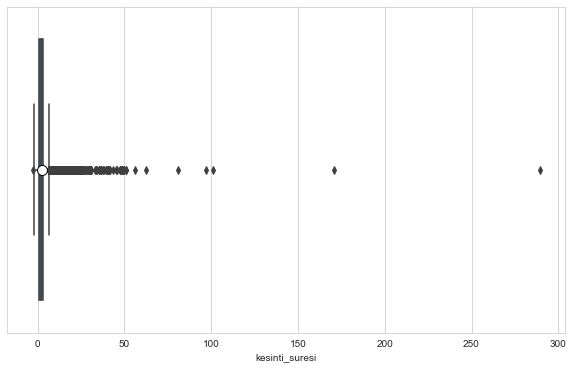

In [95]:
# Checking the boxplot to see extreme values
sns.boxplot(data=df, 
            x="kesinti_suresi",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

> so many extreme values

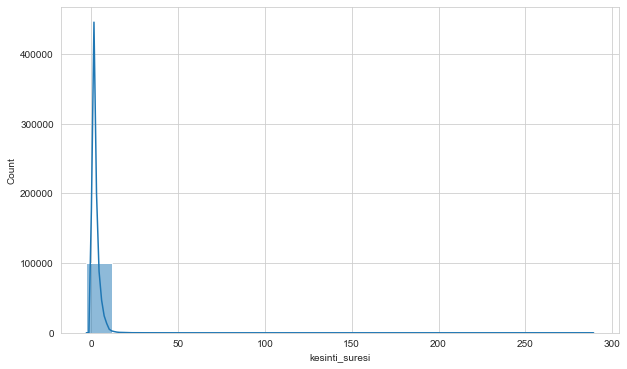

In [96]:
# Checking the histplot/kdeplot to see distribution of feature
sns.histplot(data=df, x="kesinti_suresi", bins=20, kde=True);

>Positively-skewed distribution, right-tail.

### **<span style='color:coral'> kentsel_og </span>** 

Tüm illerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 50 000 (elli bin) ve üzerinde` olan ilçelerin merkez mahallelerinin `orta gerilim kesinti hat sayısı`.

In [97]:
df.kentsel_og.value_counts(dropna=False)

0      80493
1       3927
2        967
3        701
4        685
       ...  
297        1
170        1
313        1
213        1
897        1
Name: kentsel_og, Length: 375, dtype: int64

> 80493 count for '0' 

In [98]:
df.kentsel_og.isnull().sum()

0

In [99]:
df.kentsel_og.nunique()

375

> high number of unique values

### **<span style='color:coral'> kentsel_ag </span>** 

Tüm illerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 50 000 (elli bin) ve üzerinde` olan ilçelerin merkez mahallelerinin `alçak gerilim kesinti hat sayısı`.

In [102]:
df.kentsel_ag.value_counts(dropna=False)

0        29403
1        14233
2         3864
3         2411
4         1788
         ...  
11601        1
11386        1
6496         1
3254         1
7073         1
Name: kentsel_ag, Length: 4223, dtype: int64

In [103]:
df.kentsel_ag.isnull().sum()

0

In [104]:
df.kentsel_ag.nunique()

4223

> high number of unique values

### **<span style='color:coral'> kentalti_og </span>** 

Kentsel olmayan ilçelerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin) ve üzerinde` olan mahallelerinin `orta gerilim kesinti hat sayısı`.

In [105]:
df.kentalti_og.value_counts(dropna=False)

0      95244
1       1022
2        534
3        388
4        346
       ...  
308        1
218        1
103        1
163        1
197        1
Name: kentalti_og, Length: 170, dtype: int64

In [106]:
df.kentalti_og.isnull().sum()

0

In [107]:
df.kentalti_og.nunique()

170

> high number of unique values

### **<span style='color:coral'> kentalti_ag </span>** 

Kentsel olmayan ilçelerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin) ve üzerinde` olan mahallelerinin `alçak gerilim kesinti hat sayısı`.

In [108]:
df.kentalti_ag.value_counts(dropna=False)

0       83513
1        4436
2         993
3         392
5         329
        ...  
3927        1
432         1
467         1
1898        1
6100        1
Name: kentalti_ag, Length: 1318, dtype: int64

In [109]:
df.kentalti_ag.isnull().sum()

0

In [110]:
df.kentalti_ag.nunique()

1318

> high number of unique values

### **<span style='color:coral'> kirsal_og </span>** 

Kentsel olmayan ilçelerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre n`üfusu 2 000 (iki bin)in altında` olan mahallelerinin `orta gerilim hat sayısı`.

In [111]:
df.kirsal_og.value_counts(dropna=False)

0      92806
1       1498
2        556
3        462
5        301
       ...  
268        1
74         1
130        1
245        1
132        1
Name: kirsal_og, Length: 231, dtype: int64

In [112]:
df.kirsal_og.isnull().sum()

0

In [113]:
df.kirsal_og.nunique()

231

> high number of unique values

### **<span style='color:coral'> kirsal_ag </span>** 

Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin)in altında` olan mahallelerinin `alçak gerilim hat sayısı`.

In [114]:
df.kirsal_ag.value_counts(dropna=False)

0       83216
1        2920
2         559
4         305
3         285
        ...  
3228        1
4556        1
4131        1
4560        1
4547        1
Name: kirsal_ag, Length: 1396, dtype: int64

In [115]:
df.kirsal_ag.isnull().sum()

0

In [116]:
df.kirsal_ag.nunique()

1396

> high number of unique values

### **<span style='color:coral'> toplam_kentsel_og </span>** 

Birimi `saat`tir.Tüm illerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 50 000 (elli bin) ve üzerinde` olan ilçelerin merkez mahallelerinin `orta gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [117]:
df.toplam_kentsel_og.value_counts(dropna=False)

0.000      80353
NaN          140
0.033         20
0.067         18
0.275         14
           ...  
111.507        1
13.054         1
205.364        1
28.918         1
2.871          1
Name: toplam_kentsel_og, Length: 17183, dtype: int64

In [118]:
df.toplam_kentsel_og.isnull().sum()

140

In [119]:
df.toplam_kentsel_og.nunique()

17182

> high number of unique values

In [121]:
df.columns

Index(['kesinti_no', 'il', 'ilce', 'sebeke_unsuru', 'sebeke_unsuru_kodu',
       'kesinti_nedenine_iliskin_aciklama', 'kaynaga_gore', 'sureye_gore',
       'sebebe_gore', 'bildirime_gore', 'baslama_tarihi_ve_zamani',
       'sona_erme_tarihi_ve_zamani', 'kesinti_suresi', 'kentsel_og',
       'kentsel_ag', 'kentalti_og', 'kentalti_ag', 'kirsal_og', 'kirsal_ag',
       'toplam_kentsel_og', 'toplam_kentsel_ag', 'toplam_kentalti_og',
       'toplam_kentalti_ag', 'toplam_kirsal_og', 'toplam_kirsal_ag'],
      dtype='object')

In [124]:
#checking if all null values gather on the same rows
df[df["toplam_kentsel_og"].isnull()][[  "toplam_kentsel_og", 
                                        "toplam_kentsel_ag", 
                                        "toplam_kentalti_og", 
                                        "toplam_kentalti_ag", 
                                        "toplam_kirsal_og", 
                                        "toplam_kirsal_ag"]]

,toplam_kentsel_og,toplam_kentsel_ag,toplam_kentalti_og,toplam_kentalti_ag,toplam_kirsal_og,toplam_kirsal_ag
97,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,NaN,NaN,NaN
443,NaN,NaN,NaN,NaN,NaN,NaN
447,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
20607,NaN,NaN,NaN,NaN,NaN,NaN
20831,NaN,NaN,NaN,NaN,NaN,NaN
20858,NaN,NaN,NaN,NaN,NaN,NaN
20867,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df[df["toplam_kentsel_og"].isnull()][[  "toplam_kentsel_og", 
                                        "toplam_kentsel_ag", 
                                        "toplam_kentalti_og", 
                                        "toplam_kentalti_ag", 
                                        "toplam_kirsal_og", 
                                        "toplam_kirsal_ag"]].isnull().sum()

toplam_kentsel_og     140
toplam_kentsel_ag     140
toplam_kentalti_og    140
toplam_kentalti_ag    140
toplam_kirsal_og      140
toplam_kirsal_ag      140
dtype: int64

In [126]:
df[df["toplam_kentsel_og"].isnull()][[  "toplam_kentsel_og", 
                                        "toplam_kentsel_ag", 
                                        "toplam_kentalti_og", 
                                        "toplam_kentalti_ag", 
                                        "toplam_kirsal_og", 
                                        "toplam_kirsal_ag"]].index

Int64Index([   97,   275,   325,   443,   447,   521,   605,   640,   737,
              740,
            ...
            19936, 20235, 20259, 20440, 20560, 20607, 20831, 20858, 20867,
            20889],
           dtype='int64', length=140)

In [127]:
check_index = df[df["toplam_kentsel_og"].isnull()][[  "toplam_kentsel_og", 
                                        "toplam_kentsel_ag", 
                                        "toplam_kentalti_og", 
                                        "toplam_kentalti_ag", 
                                        "toplam_kirsal_og", 
                                        "toplam_kirsal_ag"]].index

check_index

Int64Index([   97,   275,   325,   443,   447,   521,   605,   640,   737,
              740,
            ...
            19936, 20235, 20259, 20440, 20560, 20607, 20831, 20858, 20867,
            20889],
           dtype='int64', length=140)

In [131]:
df.iloc[check_index, 19:].T

,97,275,325,443,447,521,605,640,737,740,741,743,945,1009,1010,1143,1144,1230,1317,1350,1448,1528,1573,1618,1627,1629,1778,1779,2002,2020,2116,2124,2125,2126,2207,2240,2295,2340,2370,2454,2493,2514,2570,2602,2613,2639,2762,2767,2834,2845,2981,2982,3110,3178,3364,3397,3407,3425,3429,3468,3490,3672,3694,3801,3913,3959,3960,4162,4247,4249,4285,4289,4389,4397,4413,4444,7152,7153,7154,7155,7156,7157,7158,7159,7219,7430,7464,7536,7562,7708,7858,8058,8516,8594,15468,15469,15472,15744,15823,16339,16384,16597,16624,16776,16784,16785,17070,17312,17357,17421,17444,17584,17589,17669,17689,17744,18253,18304,18337,18988,18995,19034,19035,19036,19318,19486,19609,19615,19676,19782,19936,20235,20259,20440,20560,20607,20831,20858,20867,20889
toplam_kentsel_og,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toplam_kentsel_ag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toplam_kentalti_og,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toplam_kentalti_ag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toplam_kirsal_og,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toplam_kirsal_ag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

> rows with multiple null values could be dropped

### **<span style='color:coral'> toplam_kentsel_ag </span>** 

Birimi `saat`tir.Tüm illerin merkez mahalleleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 50 000 (elli bin) ve üzerinde` olan ilçelerin merkez mahallelerinin `alçak gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [133]:
df.toplam_kentsel_ag.value_counts(dropna=False)

0.000       29263
NaN           140
0.017          33
0.011          24
0.033          18
            ...  
67.317          1
646.575         1
6956.833        1
3250.900        1
0.785           1
Name: toplam_kentsel_ag, Length: 60679, dtype: int64

In [134]:
df.toplam_kentsel_ag.nunique()

60678

> high number of unique values

### **<span style='color:coral'> toplam_kentalti_og </span>** 

Birimi `saat`tir.Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin) ve üzerinde` olan mahallelerinin `orta gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [135]:
df.toplam_kentalti_og.value_counts(dropna=False)

0.000       95104
NaN           140
0.011          32
0.025          27
0.017          25
            ...  
246.583         1
22.780          1
1122.697        1
1.272           1
4.205           1
Name: toplam_kentalti_og, Length: 4697, dtype: int64

In [136]:
df.toplam_kentalti_og.nunique()

4696

> high number of unique values

### **<span style='color:coral'> toplam_kentalti_ag </span>** 

Birimi `saat`tir.Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin) ve üzerinde` olan mahallelerinin `alçak gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [137]:
df.toplam_kentalti_ag.value_counts(dropna=False)

0.000      83373
NaN          140
3.489         18
0.050         15
0.017          9
           ...  
40.854         1
21.018         1
241.939        1
60.228         1
10.074         1
Name: toplam_kentalti_ag, Length: 16052, dtype: int64

In [138]:
df.toplam_kentalti_ag.nunique()

16051

> high number of unique values

### **<span style='color:coral'> toplam_kirsal_og </span>** 

Birimi `saat`tir.Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin)in altında` olan mahallelerinin `orta gerilim` kesinti hatlarındaki `toplam kesinti süresi`.

In [139]:
df.toplam_kirsal_og.value_counts(dropna=False)

0.000     92666
NaN         140
0.067        36
0.017        34
0.050        24
          ...  
20.044        1
64.208        1
6.512         1
3.825         1
1.695         1
Name: toplam_kirsal_og, Length: 6650, dtype: int64

In [140]:
df.toplam_kirsal_og.nunique()

6649

> high number of unique values

### **<span style='color:coral'> toplam_kirsal_ag </span>** 

Birimi `saat`tir.Kentsel olmayan ilçelerin merkez mahallleri ile 2020 yılı TÜİK tarafından açıklanan nüfus verilerine göre `nüfusu 2 000 (iki bin)in altında` olan mahallelerinin alçak gerilim kesinti hatlarındaki `toplam kesinti süresi`.

In [141]:
df.toplam_kirsal_ag.value_counts(dropna=False)

0.000       83076
NaN           140
12.525         16
8.242          10
7.056           7
            ...  
5027.123        1
4.051           1
77.568          1
126.500         1
4.224           1
Name: toplam_kirsal_ag, Length: 16724, dtype: int64

In [142]:
df.toplam_kirsal_ag.nunique()

16723

> high number of unique values

## Reading the **Trafo** Data

In [143]:
df1 = pd.read_csv("trafo.csv")
df_trafo = df1.copy()

In [145]:
df_trafo.head()

,trafo_id,ŞEBEKE_UNSURU_KODU
0,0,TR-129 35-19-L00129_DIREK TIPI TRAFO HUCRESI H...
1,1,K-633 35-02-K00633_K-259 K01_2034347
2,2,UZUNDERE TM 35-01-A00013_İKİZTEPE M10_2034358
3,3,SİNDEL TR-1 35-16-M00029_DIREK TIPI TRAFO HUCR...
4,4,M-1433 35-02-M01433_M-1611 M03_2034635


In [148]:
df_trafo.tail()

,trafo_id,ŞEBEKE_UNSURU_KODU
63797,63797,L-68 EROL UĞUR SİTESİ 35-14-L00068_95001267660...
63798,63798,İM-1/TR-8 35-14-M00301_95001294481_95001294481
63799,63799,KAMUKENT TR-3 35-21-M00041_95001296977_9500129...
63800,63800,TR-2/27 45-72-L00027_95001300684_95001300684
63801,63801,M-2423 35-04-M02423_95001349833_95001349833


In [149]:
df_trafo.shape

(63802, 2)

Cleaning column names with `skimpy.clean_columns`

In [150]:
df_trafo = clean_columns(df_trafo)
print(df_trafo.columns)

1 column names have been cleaned

Index(['trafo_id', 'sebeke_unsuru_kodu'], dtype='object')


In [151]:
df_trafo.sebeke_unsuru_kodu.value_counts(dropna=False)

TR-129 35-19-L00129_DIREK TIPI TRAFO HUCRESI H01_2034310                 1
TR-34 35-15-M00034_DM-3 (TR-16) M02_66565466                             1
ÇIRPI TR-1/1 35-20-M00001_DAĞITIM TRAFO ÇIRPI TR-1/1 M02_66559964        1
ÇIRPI TR-1/1 35-20-M00001_ÇIRPI İM M01_66559969                          1
MECİDİYE TR-1 KÖK 45-72-L00078_GÖKÇEKÖY (KÖYLER ÇIKIŞI) L010_66560801    1
                                                                        ..
L-301 ÇARK 35-18-L00301_950453388_950453388                              1
L-440 35-18-L00440_950453409_950453409                                   1
L-96 35-18-L00096_950453432_950453432                                    1
L-96 35-18-L00096_950453445_950453445                                    1
M-2423 35-04-M02423_95001349833_95001349833                              1
Name: sebeke_unsuru_kodu, Length: 63802, dtype: int64

In [152]:
df_trafo.sebeke_unsuru_kodu.isnull().sum()

0

In [153]:
df_trafo.sebeke_unsuru_kodu.nunique()

63802

In [154]:
#compare train dataset 'sebeke_unsuru_kodu' with trafo dataset 'sebeke_unsuru_kodu'
df.sebeke_unsuru_kodu.nunique()

61480

## Reading the **Submission** Data

In [146]:
df2 = pd.read_csv("submission.csv")
df_sub = df2.copy()

In [147]:
df_sub.head()

,trafo_id_date,KESİNTİ
0,0__2022-10-01,NaN
1,0__2022-10-02,NaN
2,0__2022-10-03,NaN
3,0__2022-10-04,NaN
4,0__2022-10-05,NaN


Cleaning column names with `skimpy.clean_columns`

In [157]:
df_sub = clean_columns(df_sub)
print(df_sub.columns)

1 column names have been cleaned

Index(['trafo_id_date', 'kesinti'], dtype='object')


In [155]:
df_sub.shape

(4274734, 2)

In [156]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4274734 entries, 0 to 4274733
Data columns (total 2 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trafo_id_date  object 
 1   KESİNTİ        float64
dtypes: float64(1), object(1)
memory usage: 65.2+ MB


## Reading the **Weather** Data

### **<span style='color:turquoise'> Humidity </span>** 

unit = `[0:1]`

In [165]:
df3 = pd.read_csv("Weather_Bagil-Nem.csv")
df_hum = df3.copy()

In [166]:
df_hum.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df_hum.shape

(38832, 17)

In [168]:
df_hum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [174]:
skim(df_hum)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA       ┃ NA %   ┃ mean      ┃ sd        ┃ p0  ┃ p25     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ İzmir            │    27000 │     70 │    0.0067 │    0.0027 │   0 │   0.005 │   0.009 │   0.015 │  ▁▄█▅▃  │  │
│ │ Aliağa           │    27000 │     70 │    0.0084 │    0.0036 │   0 │   0.006 │    0.01 │   0.017 │ ▁▄█▆▃▂  │  │
│ │ Çeşme            │        0 │      0 │      0.48 │      0.34 │   0 │   0.014 │    0.75 │       1 │ █ ▂▆▇▂  │  │
│ │ Bergama          │    27000 │     70 │    0.0067 │    0.0028 │   0 │   0.005 │   0.009 │   0.018 │  ▁▆█▅▁  │  │
│ │ Manisa           │        0 │      0 │      0.42 │      0.32 │   0 │   0.008 │     0.7 │       1 │ █▁▄▅▅▂  │  │
│ │ Akhisar          │        0 │      0 │      0.43 │      0.33 │   0 │   0.008 │    0.71 │       1 │ █▂▃▅▅▂  │  │
│ │ Salihli          │    27000 │     70 │    0.0066 │    0.0031 │   0 │   0.004 │   0.008 │   0.019 │  ▃█▇▃   │  │
│ │ Çiğli            │    27000 │     70 │    0.0083 │    0.0042 │   0 │   0.005 │    0.01 │   0.019 │ ▃▄█▃▂▂  │  │
│ │ Menderes         │    27000 │     70 │    0.0063 │    0.0027 │   0 │   0.004 │   0.008 │   0.014 │  ▂▄█▅▂  │  │
│ │ Alaşehir         │    27000 │     70 │    0.0062 │    0.0027 │   0 │   0.004 │   0.008 │   0.016 │  ▂█▆▅▂  │  │
│ │ Demirci          │    27000 │     70 │    0.0055 │    0.0024 │   0 │   0.004 │   0.007 │   0.013 │  ▃▇█▆▃  │  │
│ │ Güzelyalı        │      310 │    0.8 │      0.41 │       0.3 │   0 │   0.009 │    0.66 │       1 │ █▁▅▆▅▁  │  │
│ │ Kula             │    27000 │     70 │     0.006 │    0.0025 │   0 │   0.004 │   0.008 │   0.016 │  ▂█▅▅▁  │  │
│ │ Ödemiş           │    27000 │     70 │     0.006 │    0.0025 │   0 │   0.004 │   0.008 │   0.015 │  ▁▄█▃▂  │  │
│ │ Soma             │    27000 │     70 │    0.0062 │    0.0026 │   0 │   0.004 │   0.008 │   0.015 │  ▁▅█▄▂  │  │
│ │ Urla             │    27000 │     70 │    0.0098 │    0.0034 │   0 │   0.008 │   0.012 │   0.019 │  ▃█▅▂▂  │  │
│ └──────────────────┴──────────┴────────┴───────────┴───────────┴─────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

### **<span style='color:turquoise'> Cloud </span>** 

unit = `[0:1]`

In [169]:
df4 = pd.read_csv("Weather_Bulutluluk-Orani.csv")
df_cloud = df4.copy()

In [170]:
df_cloud.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,0.640,0.240,0.560,0.440,0.240,0.320,0.000,0.680,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.680,0.320,0.533,0.320,0.307,0.360,0.160,0.707,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.720,0.400,0.507,0.200,0.373,0.400,0.320,0.733,0.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.560,0.640,0.320,0.240,0.480,0.320,0.360,0.560,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.627,0.693,0.360,0.267,0.573,0.467,0.467,0.627,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
df_cloud.shape

(38832, 17)

In [172]:
df_cloud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [173]:
skim(df_cloud)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA        ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir              │     27000 │      70 │    0.22 │    0.31 │    0 │     0 │    0.43 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Aliağa             │     27000 │      70 │    0.18 │    0.29 │    0 │     0 │    0.28 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Çeşme              │         0 │       0 │    0.25 │     0.3 │    0 │     0 │     0.4 │       1 │  █▂▁▁▁▁  │  │
│ │ Bergama            │     27000 │      70 │     0.2 │     0.3 │    0 │     0 │    0.36 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Manisa             │         0 │       0 │     0.3 │    0.32 │    0 │     0 │    0.53 │       1 │  █▂▁▂▁▂  │  │
│ │ Akhisar            │         0 │       0 │    0.28 │    0.32 │    0 │     0 │     0.5 │       1 │  █▂▁▁▁▁  │  │
│ │ Salihli            │     27000 │      70 │    0.19 │    0.29 │    0 │     0 │    0.31 │    0.96 │  █▁▁▁▁▁  │  │
│ │ Çiğli              │     27000 │      70 │    0.19 │    0.31 │    0 │     0 │    0.32 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Menderes           │     27000 │      70 │     0.2 │     0.3 │    0 │     0 │    0.32 │       1 │  █▁▁▁▁▁  │  │
│ │ Alaşehir           │     27000 │      70 │    0.16 │    0.27 │    0 │     0 │    0.24 │    0.92 │  █▁▁▁▁▁  │  │
│ │ Demirci            │     27000 │      70 │    0.23 │    0.32 │    0 │     0 │    0.44 │    0.96 │  █▁▁▁▁▂  │  │
│ │ Güzelyalı          │       310 │     0.8 │    0.26 │    0.32 │    0 │     0 │    0.48 │       1 │  █▂▁▁▁▁  │  │
│ │ Kula               │     27000 │      70 │    0.22 │    0.31 │    0 │     0 │    0.43 │    0.96 │  █▁▁▁▁▁  │  │
│ │ Ödemiş             │     27000 │      70 │     0.2 │     0.3 │    0 │     0 │    0.36 │    0.96 │  █▁▁▁▁▁  │  │
│ │ Soma               │     27000 │      70 │    0.24 │    0.33 │    0 │     0 │    0.48 │    0.96 │  █▁▁▁▁▂  │  │
│ │ Urla               │     27000 │      70 │    0.18 │    0.29 │    0 │     0 │    0.29 │    0.92 │  █▁▁▁▁▁  │  │
│ └────────────────────┴───────────┴─────────┴─────────┴─────────┴──────┴───────┴─────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

In [175]:
pd.concat([df_hum, df_cloud], axis=1)

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 00:00:00,0.640,0.240,0.560,0.440,0.240,0.320,0.000,0.680,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 01:00:00,0.680,0.320,0.533,0.320,0.307,0.360,0.160,0.707,0.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 02:00:00,0.720,0.400,0.507,0.200,0.373,0.400,0.320,0.733,0.493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 03:00:00,0.560,0.640,0.320,0.240,0.480,0.320,0.360,0.560,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 04:00:00,0.627,0.693,0.360,0.267,0.573,0.467,0.467,0.627,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38827,2021-01-31 19:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,2021-01-31 19:00:00,NaN,NaN,0.000,NaN,0.053,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
38828,2021-01-31 20:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,2021-01-31 20:00:00,NaN,NaN,0.000,NaN,0.027,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
38829,2021-01-31 21:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,2021-01-31 21:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN
38830,2021-01-31 22:00:00,NaN,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,2021-01-31 22:00:00,NaN,NaN,0.147,NaN,0.040,0.080,NaN,NaN,NaN,NaN,NaN,0.107,NaN,NaN,NaN,NaN


### **<span style='color:turquoise'> Radiation </span>** 

unit = `w/m²`

In [176]:
df5 = pd.read_csv("Weather_Radyasyon.csv")
df_rad = df5.copy()

In [177]:
df_rad.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla,Unnamed: 17
0,2021-02-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df_rad.shape

(38832, 18)

In [179]:
df_rad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tarih        38832 non-null  object 
 1   İzmir        11784 non-null  float64
 2   Aliağa       11784 non-null  float64
 3   Çeşme        38832 non-null  float64
 4   Bergama      11784 non-null  float64
 5   Manisa       38832 non-null  float64
 6   Akhisar      38832 non-null  float64
 7   Salihli      11784 non-null  float64
 8   Çiğli        11784 non-null  float64
 9   Menderes     11784 non-null  float64
 10  Alaşehir     11472 non-null  float64
 11  Demirci      11472 non-null  float64
 12  Güzelyalı    38520 non-null  float64
 13  Kula         11472 non-null  float64
 14  Ödemiş       11472 non-null  float64
 15  Soma         11472 non-null  float64
 16  Urla         11472 non-null  float64
 17  Unnamed: 17  24 non-null     float64
dtypes: float64(17), object(1)
memory usage: 5.3+ M

In [180]:
skim(df_rad)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 17    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA        ┃ NA %     ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir              │     27000 │       70 │     210 │    280 │    0 │      0 │    400 │     970 │  █▁▁▁▁▁  │  │
│ │ Aliağa             │     27000 │       70 │     210 │    280 │    0 │      0 │    400 │     970 │  █▁▁▁▁▁  │  │
│ │ Çeşme              │         0 │        0 │     210 │    290 │    0 │      0 │    390 │    1200 │  █▁▁▁▁   │  │
│ │ Bergama            │     27000 │       70 │     200 │    280 │    0 │      0 │    390 │     970 │  █▁▁▁▁▁  │  │
│ │ Manisa             │         0 │        0 │     200 │    280 │    0 │      0 │    370 │    1000 │  █▁▁▁▁▁  │  │
│ │ Akhisar            │         0 │        0 │     200 │    280 │    0 │      0 │    380 │    1000 │  █▁▁▁▁▁  │  │
│ │ Salihli            │     27000 │       70 │     200 │    280 │    0 │      0 │    380 │     980 │  █▁▁▁▁▁  │  │
│ │ Çiğli              │     27000 │       70 │     210 │    280 │    0 │      0 │    390 │     970 │  █▁▁▁▁▁  │  │
│ │ Menderes           │     27000 │       70 │     210 │    290 │    0 │      0 │    400 │     980 │  █▁▁▁▁▁  │  │
│ │ Alaşehir           │     27000 │       70 │     210 │    280 │    0 │      0 │    400 │     990 │  █▁▁▁▁▁  │  │
│ │ Demirci            │     27000 │       70 │     210 │    280 │    0 │      0 │    390 │     990 │  █▁▁▁▁▁  │  │
│ │ Güzelyalı          │       310 │      0.8 │     210 │    290 │    0 │      0 │    390 │    1000 │  █▁▁▁▁▁  │  │
│ │ Kula               │     27000 │       70 │     210 │    280 │    0 │      0 │    400 │     990 │  █▁▁▁▁▁  │  │
│ │ Ödemiş             │     27000 │       70 │     210 │    290 │    0 │      0 │    400 │    1000 │  █▁▁▁▁▁  │  │
│ │ Soma               │     27000 │       70 │     200 │    280 │    0 │      0 │    380 │     970 │  █▁▁▁▁▁  │  │
│ │ Urla               │     27000 │       70 │     210 │    290 │    0 │      0 │    400 │     970 │  █▁▁▁▁▁  │  │
│ │ Unnamed: 17        │     39000 │      100 │       0 │      0 │    0 │      0 │      0 │       0 │      █   │  │
│ └────────────────────┴───────────┴──────────┴─────────┴────────┴──────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │  

### **<span style='color:turquoise'> Wind Speed </span>** 

unit = `m/s`

In [181]:
df6 = pd.read_csv("Weather_Ruzgar-Hizi.csv")
df_ws = df6.copy()

In [182]:
df_ws.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,5.171,8.368,12.943,0.905,0.921,1.905,3.142,9.162,2.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,5.357,8.827,13.499,1.078,1.025,1.980,3.294,9.380,3.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,5.545,9.287,14.057,1.253,1.140,2.055,3.447,9.606,3.141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,5.597,8.979,13.960,0.837,1.325,1.701,3.911,9.755,2.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,5.442,9.777,14.307,0.725,1.297,1.807,3.848,9.759,2.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df_ws.shape

(38832, 17)

In [184]:
df_ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [185]:
skim(df_ws)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA       ┃ NA %    ┃ mean    ┃ sd      ┃ p0       ┃ p25    ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir             │    27000 │      70 │     2.6 │     1.4 │    0.054 │    1.5 │   3.5 │     10 │   ▇█▄▁   │  │
│ │ Aliağa            │    27000 │      70 │     4.5 │     2.5 │    0.048 │    2.7 │   6.2 │     14 │  ▄█▅▃▁   │  │
│ │ Çeşme             │        0 │       0 │       5 │       3 │        0 │    2.6 │   6.9 │     18 │   ▆█▅▂   │  │
│ │ Bergama           │    27000 │      70 │     2.8 │     1.8 │    0.044 │    1.3 │   4.1 │     10 │   █▆▄▂   │  │
│ │ Manisa            │        0 │       0 │     1.6 │     1.1 │        0 │   0.81 │   2.2 │      8 │   █▆▂    │  │
│ │ Akhisar           │        0 │       0 │     2.4 │     1.7 │        0 │    1.1 │   3.3 │     14 │   █▄▁    │  │
│ │ Salihli           │    27000 │      70 │     1.7 │    0.97 │    0.004 │   0.99 │   2.3 │    6.9 │   ▆█▃▁   │  │
│ │ Çiğli             │    27000 │      70 │     3.6 │       2 │    0.043 │    2.1 │   4.8 │     14 │   ▆█▄▁   │  │
│ │ Menderes          │    27000 │      70 │     2.8 │     1.6 │     0.04 │    1.4 │   3.8 │     11 │   ██▅▁   │  │
│ │ Alaşehir          │    27000 │      70 │     1.4 │    0.92 │    0.003 │   0.65 │   1.9 │    6.1 │   █▆▃▁   │  │
│ │ Demirci           │    27000 │      70 │     1.7 │    0.87 │    0.015 │    1.1 │   2.2 │    7.3 │   ▅█▂    │  │
│ │ Güzelyalı         │      310 │     0.8 │     2.7 │     1.4 │        0 │    1.6 │   3.6 │     12 │   ▆█▃    │  │
│ │ Kula              │    27000 │      70 │     1.9 │     1.1 │     0.02 │    1.1 │   2.4 │    8.7 │   ▇█▂    │  │
│ │ Ödemiş            │    27000 │      70 │     1.4 │    0.73 │    0.028 │   0.88 │   1.8 │    5.8 │   ▅█▃▁   │  │
│ │ Soma              │    27000 │      70 │       2 │     1.2 │     0.02 │      1 │   2.9 │    7.7 │   █▇▅▂   │  │
│ │ Urla              │    27000 │      70 │       4 │     2.4 │    0.018 │    2.1 │   5.7 │     14 │   ▇█▆▂   │  │
│ └───────────────────┴──────────┴─────────┴─────────┴─────────┴──────────┴────────┴───────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

### **<span style='color:turquoise'> Wind Direction </span>** 

unit = `rad`, clock-wise starting from north

In [186]:
df7 = pd.read_csv("Weather_Ruzgar-Yonu.csv")
df_wd = df7.copy()

In [187]:
df_wd.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,2.590,2.764,2.852,1.023,2.399,1.963,3.051,2.815,2.312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,2.570,2.749,2.839,0.967,2.285,1.980,3.047,2.787,2.258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,2.551,2.735,2.828,0.926,2.192,1.995,3.043,2.760,2.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,2.709,2.834,2.829,0.979,2.888,2.403,3.185,2.855,2.458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,2.674,2.853,2.849,1.216,2.749,2.265,3.134,2.836,2.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df_wd.shape

(38832, 17)

In [189]:
df_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [190]:
skim(df_wd)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA       ┃ NA %    ┃ mean    ┃ sd     ┃ p0       ┃ p25     ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir             │    27000 │      70 │     2.4 │      2 │    0.001 │    0.52 │   3.7 │    6.3 │  █▃▃▂▁▃  │  │
│ │ Aliağa            │    27000 │      70 │     2.2 │    1.7 │        0 │    0.72 │   3.4 │    6.3 │  █▄▂▂▂▁  │  │
│ │ Çeşme             │        0 │       0 │     2.6 │    2.2 │        0 │    0.38 │   4.1 │    6.3 │  █▁▃▃▁▄  │  │
│ │ Bergama           │    27000 │      70 │     1.8 │    1.7 │    0.001 │    0.73 │   3.5 │    6.3 │  █▁ ▂▁▁  │  │
│ │ Manisa            │        0 │       0 │     2.4 │    1.7 │        0 │    0.86 │   3.8 │    6.3 │  █▅▃▄▃▂  │  │
│ │ Akhisar           │        0 │       0 │     2.7 │    2.2 │        0 │    0.46 │   4.9 │    6.3 │  █▃▂▂▂▅  │  │
│ │ Salihli           │    27000 │      70 │     3.2 │    1.8 │    0.001 │     1.4 │   4.8 │    6.3 │  ▄█▂▄▇▅  │  │
│ │ Çiğli             │    27000 │      70 │     2.5 │    2.1 │        0 │     0.6 │   4.3 │    6.3 │  █▃▃▂▁▄  │  │
│ │ Menderes          │    27000 │      70 │     2.4 │    2.2 │        0 │    0.33 │   4.3 │    6.3 │  █▂▂▂▁▄  │  │
│ │ Alaşehir          │    27000 │      70 │     3.5 │    1.8 │    0.001 │     2.1 │   5.3 │    6.3 │  ▃▄▇▂▄█  │  │
│ │ Demirci           │    27000 │      70 │     2.3 │      2 │        0 │    0.58 │     4 │    6.3 │  █▂▂▂▁▃  │  │
│ │ Güzelyalı         │      310 │     0.8 │     2.9 │      2 │        0 │    0.83 │   4.9 │    6.3 │  █▃▆▂▄▆  │  │
│ │ Kula              │    27000 │      70 │     2.8 │    1.8 │        0 │     1.4 │   4.7 │    6.3 │  ▃█▂▁▅▂  │  │
│ │ Ödemiş            │    27000 │      70 │     2.5 │    2.1 │        0 │    0.57 │   4.5 │    6.3 │  █▅▂▂▃▃  │  │
│ │ Soma              │    27000 │      70 │     1.7 │    1.8 │        0 │    0.38 │   2.7 │    6.3 │  █▂▂▁▁▁  │  │
│ │ Urla              │    27000 │      70 │     2.6 │    2.2 │        0 │    0.32 │   4.7 │    6.3 │  █▁▃▂▁▄  │  │
│ └───────────────────┴──────────┴─────────┴─────────┴────────┴──────────┴─────────┴───────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

### **<span style='color:turquoise'> Temperature </span>** 

unit = `Celcius`

In [191]:
df8 = pd.read_csv("Weather_Sicaklik.csv")
df_temp = df8.copy()

In [192]:
df_temp.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,10.357,13.682,16.307,6.082,5.957,5.007,5.907,13.857,7.682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,10.142,13.692,16.317,5.859,6.059,4.942,6.409,13.709,7.309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,9.928,13.703,16.328,5.636,6.161,4.878,6.911,13.561,6.936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,11.461,14.811,17.236,6.561,8.611,7.061,9.286,14.811,7.811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,10.800,14.816,16.999,6.583,8.199,6.150,9.150,14.516,7.433,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df_temp.shape

(12528, 17)

In [194]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      12528 non-null  object 
 1   İzmir      12528 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      12528 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     12528 non-null  float64
 6   Akhisar    12528 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11088 non-null  float64
 11  Demirci    11088 non-null  float64
 12  Güzelyalı  11088 non-null  float64
 13  Kula       11088 non-null  float64
 14  Ödemiş     11088 non-null  float64
 15  Soma       11088 non-null  float64
 16  Urla       11088 non-null  float64
dtypes: float64(16), object(1)
memory usage: 1.6+ MB


In [195]:
skim(df_temp)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12528  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA      ┃ NA %    ┃ mean    ┃ sd     ┃ p0      ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir              │       0 │       0 │      15 │    8.8 │    -5.8 │      9 │     22 │      38 │  ▁▅█▆▄▁  │  │
│ │ Aliağa             │     740 │     5.9 │      16 │    7.6 │    -2.9 │     11 │     22 │      35 │  ▁▅█▇▅▁  │  │
│ │ Çeşme              │       0 │       0 │      17 │    6.2 │     1.9 │     13 │     22 │      34 │  ▁▅█▅▄▁  │  │
│ │ Bergama            │     740 │     5.9 │      15 │    9.5 │    -9.4 │    8.2 │     22 │      40 │  ▁▅█▆▄▁  │  │
│ │ Manisa             │       0 │       0 │      14 │    9.7 │     -11 │    6.9 │     21 │      41 │  ▁▅█▆▄▁  │  │
│ │ Akhisar            │       0 │       0 │      14 │    9.9 │     -12 │    6.6 │     21 │      41 │  ▁▅█▆▄▁  │  │
│ │ Salihli            │     740 │     5.9 │      14 │    9.2 │    -9.8 │    6.8 │     20 │      37 │  ▁▅██▅▁  │  │
│ │ Çiğli              │     740 │     5.9 │      16 │    8.3 │    -6.3 │     11 │     23 │      37 │  ▁▄█▇▅▂  │  │
│ │ Menderes           │     740 │     5.9 │      15 │    9.6 │    -8.4 │    8.6 │     22 │      41 │  ▁▅█▆▄▁  │  │
│ │ Alaşehir           │    1400 │      11 │      14 │    9.9 │     -12 │    6.6 │     21 │      40 │  ▁▅██▄▁  │  │
│ │ Demirci            │    1400 │      11 │      11 │    9.8 │     -15 │    4.3 │     18 │      37 │  ▁▄█▇▄▁  │  │
│ │ Güzelyalı          │    1400 │      11 │      16 │    8.8 │    -5.8 │    9.6 │     23 │      38 │  ▁▅█▆▄▁  │  │
│ │ Kula               │    1400 │      11 │      13 │     10 │     -14 │    5.8 │     20 │      39 │  ▁▄█▇▄▁  │  │
│ │ Ödemiş             │    1400 │      11 │      15 │    9.3 │      -8 │    7.9 │     21 │      40 │  ▁▅█▇▄▁  │  │
│ │ Soma               │    1400 │      11 │      14 │    9.5 │      -9 │    7.2 │     21 │      40 │  ▁▅█▇▄▁  │  │
│ │ Urla               │    1400 │      11 │      17 │    7.7 │    -2.4 │     11 │     23 │      37 │  ▁▅█▇▄▁  │  │
│ └────────────────────┴─────────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    25000 │  │
│ └───────────────────────────┴─────────┴────────────┴──

### **<span style='color:turquoise'> Precipitation </span>** 

unit = `kg/m²`

In [196]:
df9 = pd.read_csv("Weather_Yagis.csv")
df_rain = df9.copy()

In [197]:
df_rain.head()

,Tarih,İzmir,Aliağa,Çeşme,Bergama,Manisa,Akhisar,Salihli,Çiğli,Menderes,Alaşehir,Demirci,Güzelyalı,Kula,Ödemiş,Soma,Urla
0,2021-02-01 00:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01 01:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-01 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-01 03:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01 04:00:00,0.000,0.000,0.021,0.000,0.000,0.000,0.000,0.000,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
df_rain.shape

(38832, 17)

In [199]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38832 entries, 0 to 38831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tarih      38832 non-null  object 
 1   İzmir      11784 non-null  float64
 2   Aliağa     11784 non-null  float64
 3   Çeşme      38832 non-null  float64
 4   Bergama    11784 non-null  float64
 5   Manisa     38832 non-null  float64
 6   Akhisar    38832 non-null  float64
 7   Salihli    11784 non-null  float64
 8   Çiğli      11784 non-null  float64
 9   Menderes   11784 non-null  float64
 10  Alaşehir   11472 non-null  float64
 11  Demirci    11472 non-null  float64
 12  Güzelyalı  38520 non-null  float64
 13  Kula       11472 non-null  float64
 14  Ödemiş     11472 non-null  float64
 15  Soma       11472 non-null  float64
 16  Urla       11472 non-null  float64
dtypes: float64(16), object(1)
memory usage: 5.0+ MB


In [200]:
skim(df_rain)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38832  │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 17     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA        ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25   ┃ p75      ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ İzmir             │     27000 │      70 │    0.31 │     1.4 │    0 │     0 │        0 │      31 │    █     │  │
│ │ Aliağa            │     27000 │      70 │    0.31 │     1.2 │    0 │     0 │        0 │      27 │    █     │  │
│ │ Çeşme             │         0 │       0 │    0.15 │    0.78 │    0 │     0 │        0 │      27 │    █     │  │
│ │ Bergama           │     27000 │      70 │    0.31 │     1.2 │    0 │     0 │        0 │      27 │    █     │  │
│ │ Manisa            │         0 │       0 │    0.16 │       1 │    0 │     0 │    0.001 │      41 │    █     │  │
│ │ Akhisar           │         0 │       0 │    0.13 │    0.82 │    0 │     0 │        0 │      50 │    █     │  │
│ │ Salihli           │     27000 │      70 │    0.28 │     1.1 │    0 │     0 │    0.021 │      21 │    █     │  │
│ │ Çiğli             │     27000 │      70 │    0.31 │     1.4 │    0 │     0 │        0 │      31 │    █     │  │
│ │ Menderes          │     27000 │      70 │    0.35 │     1.6 │    0 │     0 │        0 │      36 │    █     │  │
│ │ Alaşehir          │     27000 │      70 │    0.27 │     1.1 │    0 │     0 │        0 │      21 │    █     │  │
│ │ Demirci           │     27000 │      70 │    0.27 │     1.1 │    0 │     0 │    0.042 │      15 │    █     │  │
│ │ Güzelyalı         │       310 │     0.8 │    0.15 │     0.9 │    0 │     0 │        0 │      33 │    █     │  │
│ │ Kula              │     27000 │      70 │    0.27 │     1.1 │    0 │     0 │        0 │      21 │    █     │  │
│ │ Ödemiş            │     27000 │      70 │    0.33 │     1.3 │    0 │     0 │        0 │      24 │    █     │  │
│ │ Soma              │     27000 │      70 │    0.28 │     1.3 │    0 │     0 │        0 │      25 │    █     │  │
│ │ Urla              │     27000 │      70 │     0.3 │     1.4 │    0 │     0 │        0 │      31 │    █     │  │
│ └───────────────────┴───────────┴─────────┴─────────┴─────────┴──────┴───────┴──────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tarih                     │       0 │          0 │                            2 │                    78000 │  │
│ └───────────────────────────┴─────────┴────────────┴──